# Preparing data for Classification

In [1]:
import pandas as pd

In [2]:
crime_data = pd.read_csv("C:/Users/kasra/Desktop/crime_data_cleaned.csv")

In [4]:
# First, convert to datetime if needed
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])


# First, convert to datetime if needed
crime_data['TIME OCC'] = pd.to_datetime(crime_data['TIME OCC'])

# Then extract only the date part
crime_data['TIME OCC'] = crime_data['TIME OCC'].dt.time




C:\Users\kasra\AppData\Local\Temp\ipykernel_6724\1916047288.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])


Here the **DATE OCC** and **TIME OCC** are combined to form a unique datetime column

In [5]:
from datetime import datetime

crime_data['DATETIME_OCC'] = crime_data.apply(
    lambda row: datetime.combine(row['DATE OCC'].date(), row['TIME OCC']) if pd.notnull(row['TIME OCC']) else pd.NaT,
    axis=1
)


In [6]:
crime_data.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,LAT,LON,TIME_OCC_MINUTES,HOUR_BIN,HOUR_BIN_SHIFTED,HOUR,MINUTE,Vict Descent Grouped,Vict Descent Encoded,DATETIME_OCC
0,190326475,2020-03-01,2020-03-01,21:30:00,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,1290,21,15,21,30,Other,3,2020-03-01 21:30:00
1,200106753,2020-02-09,2020-02-08,18:00:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,34.0444,-118.2628,1080,18,12,18,0,Other,3,2020-02-08 18:00:00
2,200320258,2020-11-11,2020-11-04,17:00:00,3,Southwest,356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,1020,17,11,17,0,Hispanic/Latin/Mexican,2,2020-11-04 17:00:00
3,200907217,2023-05-10,2020-03-10,20:37:00,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,1237,20,14,20,37,Other,3,2020-03-10 20:37:00
4,200412582,2020-09-09,2020-09-09,06:30:00,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,34.0820,-118.2130,390,6,0,6,30,No Victim,19,2020-09-09 06:30:00
5,200209713,2020-05-03,2020-05-02,18:00:00,2,Rampart,245,1,510,VEHICLE - STOLEN,...,34.0642,-118.2771,1080,18,12,18,0,No Victim,19,2020-05-02 18:00:00
6,200200759,2020-07-07,2020-07-07,13:40:00,2,Rampart,265,1,648,ARSON,...,34.0536,-118.2788,820,13,7,13,40,Black,1,2020-07-07 13:40:00
7,201308739,2020-03-27,2020-03-27,12:10:00,13,Newton,1333,1,510,VEHICLE - STOLEN,...,34.0170,-118.2643,730,12,6,12,10,No Victim,19,2020-03-27 12:10:00
8,201112065,2020-07-31,2020-07-30,20:30:00,11,Northeast,1161,1,510,VEHICLE - STOLEN,...,34.0953,-118.2974,1230,20,14,20,30,No Victim,19,2020-07-30 20:30:00
9,200121929,2020-12-04,2020-12-03,23:00:00,1,Central,105,1,510,VEHICLE - STOLEN,...,34.0710,-118.2302,1380,23,17,23,0,No Victim,19,2020-12-03 23:00:00


In [7]:
list(crime_data)

['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA',
 'AREA NAME',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON',
 'TIME_OCC_MINUTES',
 'HOUR_BIN',
 'HOUR_BIN_SHIFTED',
 'HOUR',
 'MINUTE',
 'Vict Descent Grouped',
 'Vict Descent Encoded',
 'DATETIME_OCC']

Many columns were dropped because they were not needed some of them was describing the codes and some of them was created for calculation purposes

In [8]:
crime_data = crime_data.drop(['DR_NO','AREA NAME','Part 1-2','Crm Cd Desc','Premis Desc','Status Desc','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4',
 'TIME_OCC_MINUTES',
 'HOUR_BIN',
 'HOUR_BIN_SHIFTED',
 'HOUR',
 'MINUTE',
 'Weapon Desc','Weapon Used Cd','Vict Descent Grouped','Mocodes','DATE OCC','TIME OCC','Vict Descent','LOCATION','Cross Street'], axis=1)

In [9]:
list(crime_data)

['Date Rptd',
 'AREA',
 'Rpt Dist No',
 'Crm Cd',
 'Vict Age',
 'Vict Sex',
 'Premis Cd',
 'Status',
 'LAT',
 'LON',
 'Vict Descent Encoded',
 'DATETIME_OCC']

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le_status = LabelEncoder()

# Apply label encoding
crime_data['Status'] = le_status.fit_transform(crime_data['Status'].astype(str))


In [11]:
crime_data.head(10)

,Date Rptd,AREA,Rpt Dist No,Crm Cd,Vict Age,Vict Sex,Premis Cd,Status,LAT,LON,Vict Descent Encoded,DATETIME_OCC
0,2020-03-01,7,784,510,30,1,101.0,0,34.0375,-118.3506,3,2020-03-01 21:30:00
1,2020-02-09,1,182,330,47,1,128.0,3,34.0444,-118.2628,3,2020-02-08 18:00:00
2,2020-11-11,3,356,480,19,0,502.0,3,34.0210,-118.3002,2,2020-11-04 17:00:00
3,2023-05-10,9,964,343,19,1,405.0,3,34.1576,-118.4387,3,2020-03-10 20:37:00
4,2020-09-09,4,413,510,-2,3,101.0,3,34.0820,-118.2130,19,2020-09-09 06:30:00
5,2020-05-03,2,245,510,-2,3,101.0,3,34.0642,-118.2771,19,2020-05-02 18:00:00
6,2020-07-07,2,265,648,33,1,101.0,3,34.0536,-118.2788,1,2020-07-07 13:40:00
7,2020-03-27,13,1333,510,-2,3,101.0,3,34.0170,-118.2643,19,2020-03-27 12:10:00
8,2020-07-31,11,1161,510,-2,3,101.0,0,34.0953,-118.2974,19,2020-07-30 20:30:00
9,2020-12-04,1,105,510,-2,3,101.0,3,34.0710,-118.2302,19,2020-12-03 23:00:00


In [12]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])


In [13]:
crime_data['DATETIME_OCC_TS'] = crime_data['DATETIME_OCC'].astype('int64') // 10**9
crime_data['DATE_RPTD_TS'] = crime_data['Date Rptd'].astype('int64') // 10**9


In [14]:
correlation_matrix = crime_data.select_dtypes(include='number').corr()



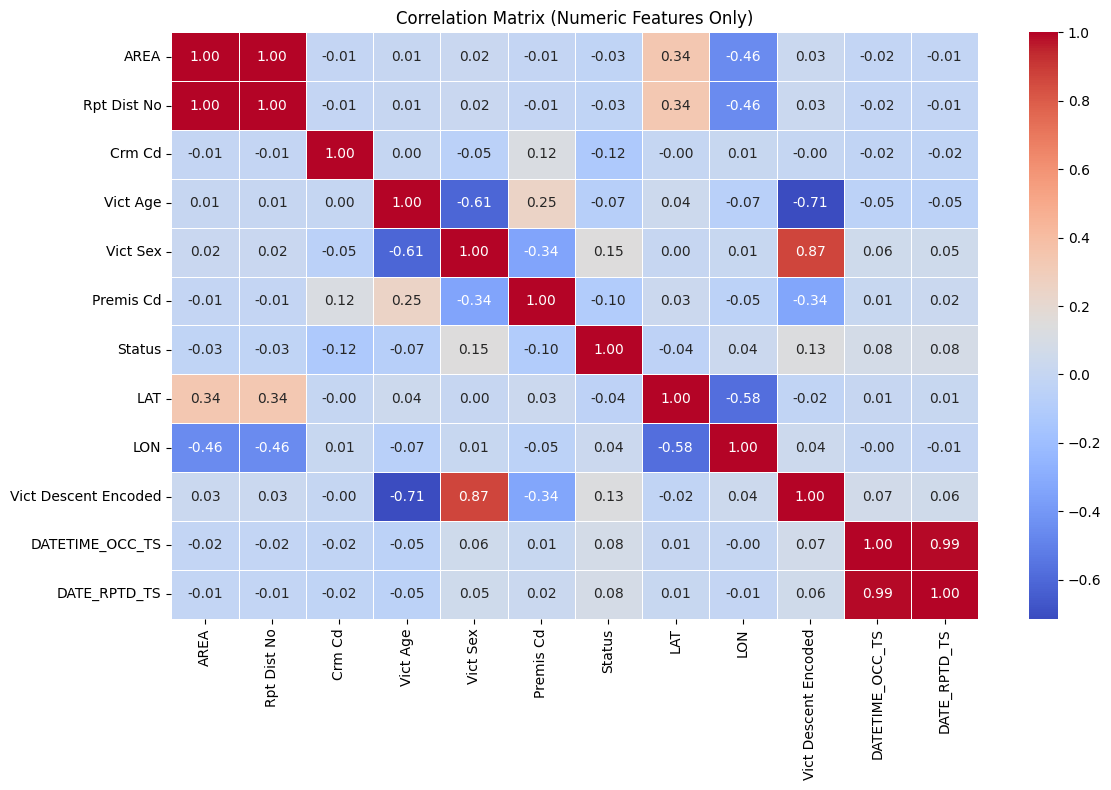

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.tight_layout()
plt.show()


In [16]:
crime_data = crime_data.drop(['Date Rptd','DATETIME_OCC'],axis=1)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # Make sure to import this


X = crime_data.drop(columns=['Vict Sex'])  # Features
y = crime_data['Vict Sex']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest model
rf_model = RandomForestClassifier(n_jobs=4, max_depth=20, min_samples_split=10, max_samples=0.8, random_state=42)

# Parameters for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Best parameters and model evaluation
print("Best parameters found: ", random_search.best_params_)
best_rf_model = random_search.best_estimator_
print("Best Random Forest model trained.")

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\kasra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kasra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kasra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pack

Best parameters found:  {'n_estimators': np.int64(250), 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best Random Forest model trained.
Accuracy: 68.81%
